In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import numpy as np, scipy.stats as st
import scipy as sp
import scipy.stats


import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', size=16)

### Reading Demographics data from SQLite pcari_userdata

In [2]:
xl = pd.ExcelFile('pcari_userdata.xlsx')
df_userdata = pd.read_excel('pcari_userdata.xlsx',sheetname=0)
df_userdata.head()

,id,age,barangay,user_id,language,gender,date_joined,Unnamed: 7,Barangay,Municipality / City,Field Test
0,19.0,12.0,ad,178.0,Filipino,M,2016-07-21 21:12:00,NaN,Unknown,Unknown,Unknown
1,26.0,22.0,Banaba,501.0,Filipino,M,2016-11-30 10:02:00,NaN,Brgy. Banaba,San Mateo,Unknown
2,38.0,22.0,Banaba,545.0,Filipino,F,2016-12-01 05:33:00,NaN,Brgy. Banaba,San Mateo,Unknown
3,43.0,-1.0,Banaba,552.0,Filipino,F,2016-12-01 06:56:00,NaN,Brgy. Banaba,San Mateo,Unknown
4,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,NaN,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila"


In [3]:
df_userdata.rename(columns={' age':'age'}, inplace=True)
df_userdata.rename(columns={'Field Test':'field_test'}, inplace=True)
df_userdata1 = df_userdata.dropna(subset=['field_test'])
df_userdata1.shape

(1155, 11)

### Cleaning demographics dataset to remove unknowns

In [4]:
df_userdata1 = df_userdata1.dropna(axis=1, how='all')
df_userdata1 = df_userdata1[df_userdata1.field_test != 'Unknown']
df_userdata1.shape

(1077, 10)

In [5]:
# Creating age_groups
age_bins = bins = [-2,17, 24, 34, 54, 200]
group_names = ['0','1', '2', '3', '4']
df_userdata1['age_group'] = pd.cut(df_userdata1['age'], bins, labels=group_names)
df_userdata1 = df_userdata1[(df_userdata1['age'] <1) | (df_userdata1['age'] > 17) ]

In [6]:
df_userdata1.shape

(998, 11)

In [7]:
df_userdata1.head()

,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group
4,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",3
6,52.0,22.0,412,577.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",1
7,53.0,66.0,412,579.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4
8,54.0,56.0,412,578.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4
9,55.0,61.0,Barangay 412,580.0,Filipino,F,2016-12-02 01:21:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4


In [8]:
df_userdata1.groupby('field_test').count()

,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,age_group
field_test,,,,,,,,,,
"AMA Computer College, Iloilo",40,40,29,40,40,29,40,11,11,40
"AMA Computer University, Caloocan",79,79,48,79,79,48,79,31,31,79
Bicol University,31,31,19,31,31,20,31,12,12,31
Brgy. 59 Puro,31,31,13,31,31,13,31,31,31,31
"Brgy. Banaba, San Mateo, Rizal",154,154,150,154,154,149,154,154,154,154
Deaf Manila Districts Organization,16,16,16,16,16,16,16,0,0,16
National University,198,198,188,198,198,193,198,15,15,198
"SM Malls employees, Iloilo",75,75,66,75,75,66,75,9,9,75
"SM Malls employees, Malabon",54,54,51,54,54,49,54,3,3,54


### Creating the comments dataset from SQLite pcari_comment

In [9]:
df_comment= pd.read_csv('pcari_comment_shresh.csv', names=['cid', 'comment', 'date', 'number_rated', 'tag', 'user_id','filipino_comment','average_score','original_language','se'])
df_comment.head()

,cid,comment,date,number_rated,tag,user_id,filipino_comment,average_score,original_language,se
0,7588,Hold drill exercises so that people would know...,2016-11-02 16:50:10.245631,25,NaN,178,Pagsasagawa ng drill upang magkaroon ng kaalam...,7.960000,English,0.264116
1,7589,"Group text message, Social Media at Local News...",2016-11-02 16:50:10.247030,23,NaN,178,"Group text message, Social Media at Local News...",7.434783,English,0.413332
2,7590,Ensure that the water ways are clean and there...,2016-11-02 16:50:10.247942,26,NaN,178,"Siguraduhin na malinis ang mga kanal, magkaroo...",7.269231,English,0.347076
3,7591,It would help for the barangay to distribute p...,2016-11-02 16:50:10.248992,27,NaN,178,Nakabubuti na mamigay ang barangay ng mga pamp...,7.592593,English,0.193245
4,7592,More effective disaster drills and seminars fo...,2016-11-02 16:50:10.250108,29,NaN,178,Magkaroon ng mas epektibong disaster drill at ...,8.206897,English,0.151902


### Creating the comment ratings dataset from SQLite from pcari_commentrating

In [10]:
df_commentrating= pd.read_csv('pcari_commentrating_shresh.csv', names=['id', 'cid', 'score', 'date', 'user_id','accounted'])
df_commentrating.head()

,id,cid,score,date,user_id,accounted
0,147,7594,7,2016-11-30 10:02:52.903790,501,1
1,148,7593,3,2016-11-30 10:02:59.520096,501,1
2,158,7592,8,2016-12-01 05:54:52.048538,545,1
3,159,7590,2,2016-12-01 05:54:56.672842,545,1
4,163,7595,4,2016-12-01 06:58:27.290491,552,1


In [11]:
len(df_commentrating.user_id.unique())

996

### Exploring the datasets

In [12]:
df_commentrating[df_commentrating.cid == 8286]

,id,cid,score,date,user_id,accounted
1199,2424,8286,8,2017-03-20 08:30:39.670449,1682,1
1213,2441,8286,2,2017-03-20 08:31:42.184609,1677,1
1216,2445,8286,9,2017-03-20 08:32:05.207829,1675,1
1684,3308,8286,7,2017-03-24 08:04:39.760437,2055,1


In [13]:
df_commentrating.groupby('cid').count().sort('id', ascending=False).to_csv('check.csv')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [14]:
len(df_comment.user_id.unique())

970

In [15]:
df_comment[df_comment.cid == 7590]

,cid,comment,date,number_rated,tag,user_id,filipino_comment,average_score,original_language,se
2,7590,Ensure that the water ways are clean and there...,2016-11-02 16:50:10.247942,26,NaN,178,"Siguraduhin na malinis ang mga kanal, magkaroo...",7.269231,English,0.347076


In [16]:
df_comment[df_comment.user_id == 1585]

,cid,comment,date,number_rated,tag,user_id,filipino_comment,average_score,original_language,se
362,8286,Inform the community one week before the impac...,2017-03-18 04:00:30.907956,5,NaN,1585,NaN,7.000000,English,1.166190
369,8293,Inform the community one week before the impac...,2017-03-18 04:02:44.583833,2,NaN,1585,NaN,9.000000,English,0.000000
370,8294,Inform the community one week before the impac...,2017-03-18 04:02:44.989779,3,NaN,1585,NaN,6.666667,English,0.981307
372,8296,Inform the community one week before the impac...,2017-03-18 04:02:50.596843,2,NaN,1585,NaN,9.000000,English,0.000000
376,8300,Inform the community one week before the impac...,2017-03-18 04:04:37.592503,3,NaN,1585,NaN,7.666667,English,0.720082
377,8301,Inform the community one week before the impac...,2017-03-18 04:04:56.664541,5,NaN,1585,NaN,6.800000,English,1.277498
378,8302,Inform the community one week before the impac...,2017-03-18 04:05:14.640623,8,NaN,1585,NaN,7.750000,English,0.522913
379,8303,Inform the community one week before the impac...,2017-03-18 04:05:30.622053,3,NaN,1585,NaN,8.333333,English,0.272166
380,8304,Inform the community one week before the impac...,2017-03-18 04:05:51.260039,3,NaN,1585,NaN,8.666667,English,0.272166


### Merging the demographics dataset with the comment dataset to get the comments of the 998 users

In [17]:
df_user_comment = pd.merge(df_userdata1, df_comment, on='user_id', how='left', suffixes=('_userdata', '_comment'))
df_user_comment.head()

,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group,cid,comment,date,number_rated,tag,filipino_comment,average_score,original_language,se
0,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",3,7610.0,magkaisa dapat ang mga tao,2016-12-02 01:09:15.973794,3.0,NaN,NaN,6.000000,Filipino,1.414214
1,52.0,22.0,412,577.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",1,7614.0,mag karoon ng pagkakaiisa upang sa mga daratin...,2016-12-02 01:26:30.008899,4.0,NaN,NaN,4.250000,Filipino,1.512965
2,53.0,66.0,412,579.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4,7613.0,Magkaroon ng komunikasyon kung saan magkikita ...,2016-12-02 01:26:22.958192,17.0,NaN,NaN,8.176471,Filipino,0.400996
3,54.0,56.0,412,578.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4,7615.0,"paglilinis ng kanal, wastong pagtatapon ng bas...",2016-12-02 01:30:31.593621,13.0,NaN,NaN,8.538462,Filipino,0.300205
4,55.0,61.0,Barangay 412,580.0,Filipino,F,2016-12-02 01:21:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4,7617.0,Malawakang information drive,2016-12-02 01:32:18.991500,10.0,NaN,NaN,7.700000,Filipino,0.800625


In [18]:
df_user_comment.shape

(1037, 20)

In [26]:
df_user_comment[df_user_comment.user_id == 2007]

,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group,cid,comment,date,number_rated,tag,filipino_comment,average_score,original_language,se
520,1420.0,47.0,Banaba,2007.0,Filipino,F,2017-03-24 06:35:00,Brgy. Banaba,San Mateo,"Brgy. Banaba, San Mateo, Rizal",3,8691.0,NaN,2017-03-24 06:43:15.981419,1.0,NaN,Gusto po na maayus ang basira dito,9.0,Filipino,0.0


In [46]:
# dropping rows which contain no comments
df_user_comment = df_user_comment.dropna(axis=0,subset= ['comment'])

In [48]:
df_user_comment.shape

(516, 20)

In [49]:
df_user_comment.groupby('user_id').count().sort('id', ascending=False).head()

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,age,barangay,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group,cid,comment,date,number_rated,tag,filipino_comment,average_score,original_language,se
user_id,,,,,,,,,,,,,,,,,,,
1585.0,9,9,9,9,9,9,0,0,9,9,9,9,9,9,0,0,9,9,9
1587.0,6,6,6,6,6,6,0,0,6,6,6,6,6,6,0,0,6,6,6
1584.0,3,3,3,3,3,3,0,0,3,3,3,3,3,3,0,0,3,3,3
2741.0,3,3,3,3,3,3,0,0,3,3,3,3,3,3,0,0,3,3,3
2767.0,2,2,0,2,0,2,2,2,2,2,2,2,2,2,0,0,2,2,2



## No of unique comments = 516 - 23  =  493
(accounting for the more than 1 instance for a paticular user )

### There seems to be an error below where for the same user id there are different cids with the same suggestion

In [50]:
df_user_comment[df_user_comment.user_id == 1585]

,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group,cid,comment,date,number_rated,tag,filipino_comment,average_score,original_language,se
329,999.0,26.0,Bangkal,1585.0,English,M,2017-03-18 03:54:00,NaN,NaN,National University,2,8286.0,Inform the community one week before the impac...,2017-03-18 04:00:30.907956,5.0,NaN,NaN,7.000000,English,1.166190
330,999.0,26.0,Bangkal,1585.0,English,M,2017-03-18 03:54:00,NaN,NaN,National University,2,8293.0,Inform the community one week before the impac...,2017-03-18 04:02:44.583833,2.0,NaN,NaN,9.000000,English,0.000000
331,999.0,26.0,Bangkal,1585.0,English,M,2017-03-18 03:54:00,NaN,NaN,National University,2,8294.0,Inform the community one week before the impac...,2017-03-18 04:02:44.989779,3.0,NaN,NaN,6.666667,English,0.981307
332,999.0,26.0,Bangkal,1585.0,English,M,2017-03-18 03:54:00,NaN,NaN,National University,2,8296.0,Inform the community one week before the impac...,2017-03-18 04:02:50.596843,2.0,NaN,NaN,9.000000,English,0.000000
333,999.0,26.0,Bangkal,1585.0,English,M,2017-03-18 03:54:00,NaN,NaN,National University,2,8300.0,Inform the community one week before the impac...,2017-03-18 04:04:37.592503,3.0,NaN,NaN,7.666667,English,0.720082
334,999.0,26.0,Bangkal,1585.0,English,M,2017-03-18 03:54:00,NaN,NaN,National University,2,8301.0,Inform the community one week before the impac...,2017-03-18 04:04:56.664541,5.0,NaN,NaN,6.800000,English,1.277498
335,999.0,26.0,Bangkal,1585.0,English,M,2017-03-18 03:54:00,NaN,NaN,National University,2,8302.0,Inform the community one week before the impac...,2017-03-18 04:05:14.640623,8.0,NaN,NaN,7.750000,English,0.522913
336,999.0,26.0,Bangkal,1585.0,English,M,2017-03-18 03:54:00,NaN,NaN,National University,2,8303.0,Inform the community one week before the impac...,2017-03-18 04:05:30.622053,3.0,NaN,NaN,8.333333,English,0.272166
337,999.0,26.0,Bangkal,1585.0,English,M,2017-03-18 03:54:00,NaN,NaN,National University,2,8304.0,Inform the community one week before the impac...,2017-03-18 04:05:51.260039,3.0,NaN,NaN,8.666667,English,0.272166


In [51]:
len(df_user_comment.user_id.unique())

493

In [52]:
df_user_comment.isnull().sum()

id                       0
age                      0
barangay                16
user_id                  0
language                 0
gender                   7
date_joined              0
Barangay               420
Municipality / City    420
field_test               0
age_group                0
cid                      0
comment                  0
date                     0
number_rated             0
tag                    516
filipino_comment       516
average_score            0
original_language        0
se                       0
dtype: int64

In [53]:
df_user_comment.groupby("user_id").count() 
df_user_comment.to_csv('User_comment_freq.csv')

### Merging user comments data with the comment ratings to get the frequency and calculate wilson score

In [70]:
df_new = pd.merge(df_user_comment, df_commentrating, on='cid', how='left', suffixes=('_comment', '_rating'))
df_new.head()

,id_comment,age,barangay,user_id_comment,language,gender,date_joined,Barangay,Municipality / City,field_test,...,tag,filipino_comment,average_score,original_language,se,id_rating,score,date_rating,user_id_rating,accounted
0,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",...,NaN,NaN,6.000000,Filipino,1.414214,NaN,NaN,NaN,NaN,NaN
1,52.0,22.0,412,577.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",...,NaN,NaN,4.250000,Filipino,1.512965,NaN,NaN,NaN,NaN,NaN
2,53.0,66.0,412,579.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",...,NaN,NaN,8.176471,Filipino,0.400996,651.0,9.0,2017-01-25 06:22:52.850693,1007.0,1.0
3,53.0,66.0,412,579.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",...,NaN,NaN,8.176471,Filipino,0.400996,656.0,5.0,2017-01-25 06:36:31.808103,1010.0,1.0
4,53.0,66.0,412,579.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",...,NaN,NaN,8.176471,Filipino,0.400996,765.0,8.0,2017-01-26 02:00:03.390759,1055.0,1.0


In [74]:
df_new.shape

(2675, 25)

In [76]:
# removing rows which have scores skipped 
df_new = df_new[(df_new.score != -1) & (df_new.score != -2) ]
df_new = df_new.dropna(axis = 0 , subset = ['score'])
df_new.shape

(2395, 25)

No of ratings = 2395

### Calculating Wilson score for the suggestions

In [77]:

cid_list = df_new.cid.unique()
cid_interval_list = []


for cid in cid_list:

    
    a = df_new[df_new.cid == cid].score
    lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
    cid_interval_list.append({'cid':cid,'score':lb})
    
df_cid_score  = pd.DataFrame(cid_interval_list ) 
df_cid_score.sort('score', ascending=False).head()

/Applications/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,cid,score
56,7818.0,8.579422
107,7881.0,8.507584
54,7815.0,8.438827
4,7619.0,8.438827
1,7615.0,8.404903


### Calculating frequency of rating for suggestions

In [82]:
cid_list_all = df_user_comment.cid.unique()
rating_freq = []
for cid in cid_list_all:
    count = len(df_new[df_new.cid == cid])
    rating_freq.append({'cid':cid,'rate_freq':count})
    
df_rating_freq  = pd.DataFrame(rating_freq ) 
df_rating_freq.sort('rate_freq').head()

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,cid,rate_freq
0,7610.0,0
412,8794.0,0
413,8791.0,0
414,8792.0,0
415,8797.0,0


In [83]:
len(df_rating_freq)

516

In [84]:
df_rating_freq.isnull().sum()

cid          0
rate_freq    0
dtype: int64

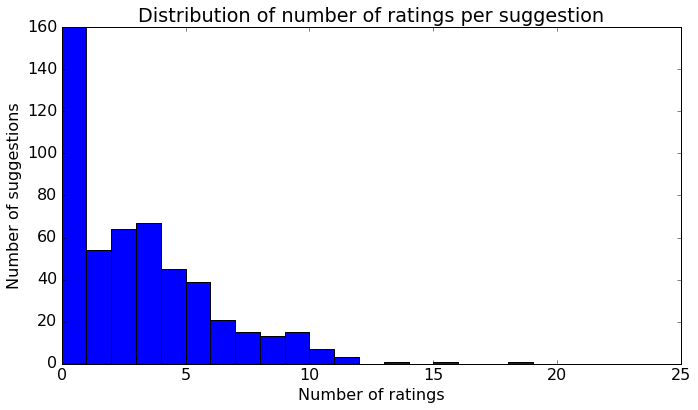

In [85]:

plt.figure(figsize=(10,6)) 
plt.hist(df_rating_freq.rate_freq,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
# plt.xticks(np.arange(-1, 10))
plt.title('Distribution of number of ratings per suggestion') 
plt.xlabel('Number of ratings')
plt.ylabel('Number of suggestions')
plt.tight_layout(h_pad=3.5)
plt.tight_layout()

In [86]:
count = len(df_new[df_new.cid == 7902])
count

137

In [87]:
df_new.groupby('cid').count().sort('id_comment',ascending=False).head()

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id_comment,age,barangay,user_id_comment,language,gender,date_joined,Barangay,Municipality / City,field_test,...,tag,filipino_comment,average_score,original_language,se,id_rating,score,date_rating,user_id_rating,accounted
cid,,,,,,,,,,,,,,,,,,,,,
7902.0,137,137,137,137,137,137,137,0,0,137,...,0,0,137,137,137,137,137,137,137,137
7842.0,135,135,135,135,135,135,135,0,0,135,...,0,0,135,135,135,135,135,135,135,135
8387.0,132,132,132,132,132,132,132,0,0,132,...,0,0,132,132,132,132,132,132,132,132
7909.0,126,126,126,126,126,126,126,0,0,126,...,0,0,126,126,126,126,126,126,126,126
8237.0,125,125,125,125,125,125,125,0,0,125,...,0,0,125,125,125,125,125,125,125,125
